Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/CNN_assignment/SCISIC_Data/Train")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/CNN_assignment/SCISIC_Data/Test")

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2249
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,seed=123,validation_split= 0.2,subset= 'training',
    image_size=(img_height,img_width),batch_size = batch_size
)

Found 2249 files belonging to 9 classes.
Using 1800 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,seed=123,validation_split= 0.2,subset= 'validation',
    image_size=(img_height,img_width),batch_size = batch_size
)

Found 2249 files belonging to 9 classes.
Using 449 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

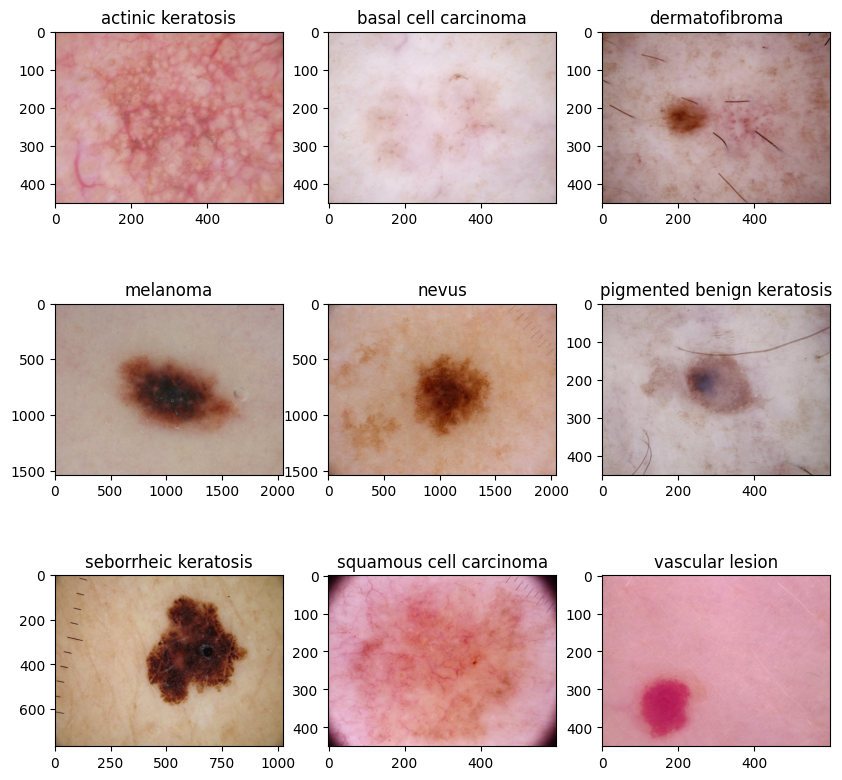

In [9]:
# Visualizing Training Data
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [58]:
### Code for creating the model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9

#Sequential for layer by layer creation of the model
model = Sequential()

#Adding Rescaling Layer
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)))

#Convolution Layer 1
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (180, 180, 32)))

#Convolution Layer 2
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Convolution Layer 3
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Convolution Layer 4
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Convolution Layer 5
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Dropout Layer with 25% Fraction
model.add(Dropout(0.25))

#Flatten Layer
model.add(Flatten())

#Dense Layer with Softmax
model.add(Dense(num_classes, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                   

### Train the model

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 692s 3s/step - loss: 2.0596 - accuracy: 0.1944 - val_loss: 2.0434 - val_accuracy: 0.1849
Epoch 2/20
57/57 [==============================] - 5s 89ms/step - loss: 2.0240 - accuracy: 0.1972 - val_loss: 2.0164 - val_accuracy: 0.2227
Epoch 3/20
57/57 [==============================] - 5s 87ms/step - loss: 1.9787 - accuracy: 0.2544 - val_loss: 1.9329 - val_accuracy: 0.2739
Epoch 4/20
57/57 [==============================] - 5s 85ms/step - loss: 1.9006 - accuracy: 0.3128 - val_loss: 1.9865 - val_accuracy: 0.2339
Epoch 5/20
57/57 [==============================] - 5s 87ms/step - loss: 1.8170 - accuracy: 0.3344 - val_loss: 1.7697 - val_accuracy: 0.3474
Epoch 6/20
57/57 [==============================] - 5s 87ms/step - loss: 1.7100 - accuracy: 0.3861 - val_loss: 1.8331 - val_accuracy: 0.3474
Epoch 7/20
57/57 [==============================] - 5s 92ms/step - loss: 1.6288 - accuracy: 0.4239 - val_loss: 1.5533 - val_accuracy: 0.4432
Epoch 8/20
57

### Visualizing training results

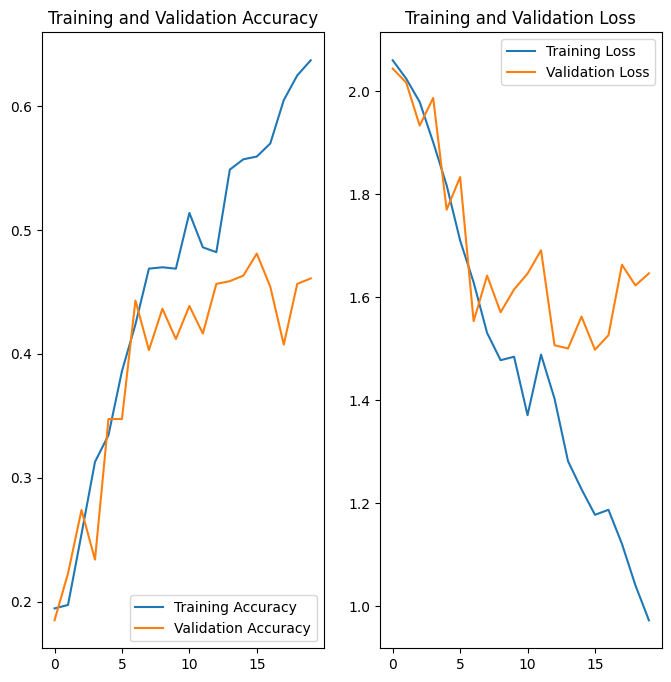

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

Findings:
1. Model is overfitting, as per the loss functions of training & test around 6-7th epochs got close and then validation loss starts to increase.

2. The accuracy is just around 50%, need to train the model more.

However, it is relatively early to come to conclusion about overfitting.

### Write your findings here

In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
data_augmentation=tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

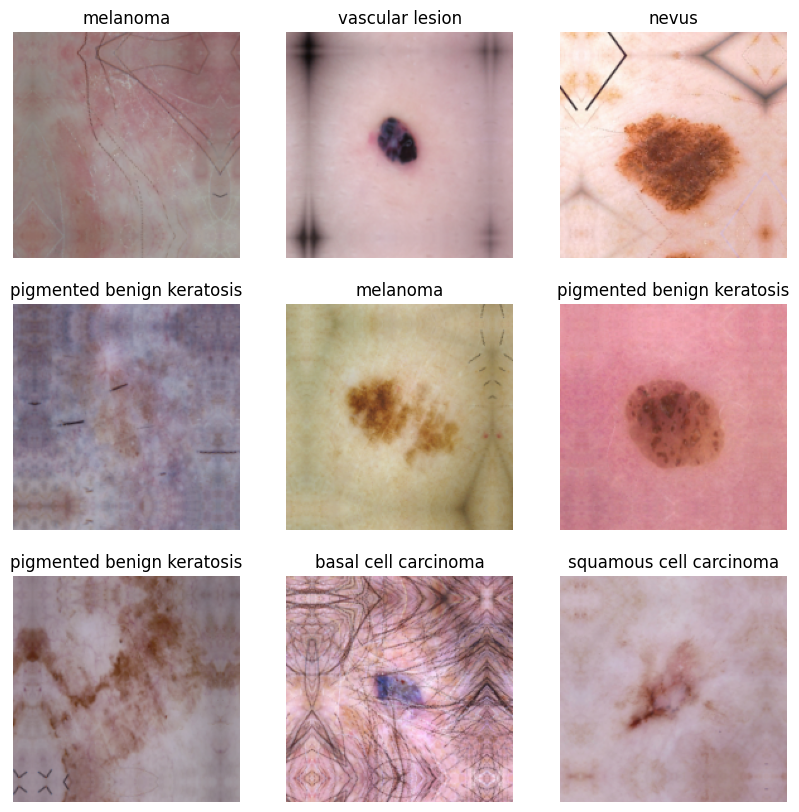

In [17]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augmentation(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [35]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Adding more convolution layers and dropout layers to the model

#Sequential for layer by layer creation of the model
model = Sequential([data_augmentation,layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])

#Convolution Layer 1
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (180, 180, 32)))

#Convolution Layer 2
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Convolution Layer 3
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Convolution Layer 4
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Convolution Layer 5
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Convolution Layer 6
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Convolution Layer 7
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


#Dropout Layer with 25% Fraction
model.add(Dropout(0.25))

#Flatten Layer
model.add(Flatten())

#Dense Layer with Softmax
model.add(Dense(num_classes, activation = "softmax"))

### Compiling the model

In [36]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

### Training the model

In [37]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 72s 105ms/step - loss: 2.0877 - accuracy: 0.1939 - val_loss: 2.0552 - val_accuracy: 0.1893
Epoch 2/20
57/57 [==============================] - 5s 96ms/step - loss: 2.0504 - accuracy: 0.2039 - val_loss: 2.0436 - val_accuracy: 0.1960
Epoch 3/20
57/57 [==============================] - 5s 93ms/step - loss: 2.0339 - accuracy: 0.1989 - val_loss: 2.0455 - val_accuracy: 0.1849
Epoch 4/20
57/57 [==============================] - 5s 95ms/step - loss: 2.0408 - accuracy: 0.1900 - val_loss: 2.0407 - val_accuracy: 0.1960
Epoch 5/20
57/57 [==============================] - 5s 93ms/step - loss: 2.0305 - accuracy: 0.2033 - val_loss: 2.0360 - val_accuracy: 0.1960
Epoch 6/20
57/57 [==============================] - 5s 91ms/step - loss: 2.0277 - accuracy: 0.1950 - val_loss: 2.0387 - val_accuracy: 0.1849
Epoch 7/20
57/57 [==============================] - 5s 94ms/step - loss: 2.0410 - accuracy: 0.1972 - val_loss: 2.0408 - val_accuracy: 0.1960
Epoch 8/20


### Visualizing the results

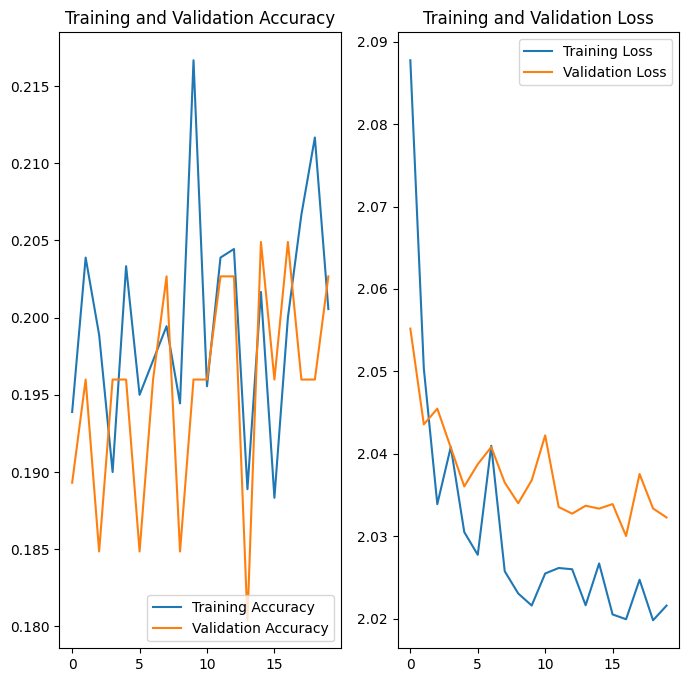

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?


Finding:
1. Accuracy although low. But overfitting problem has been reduced.


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<BarContainer object of 9 artists>

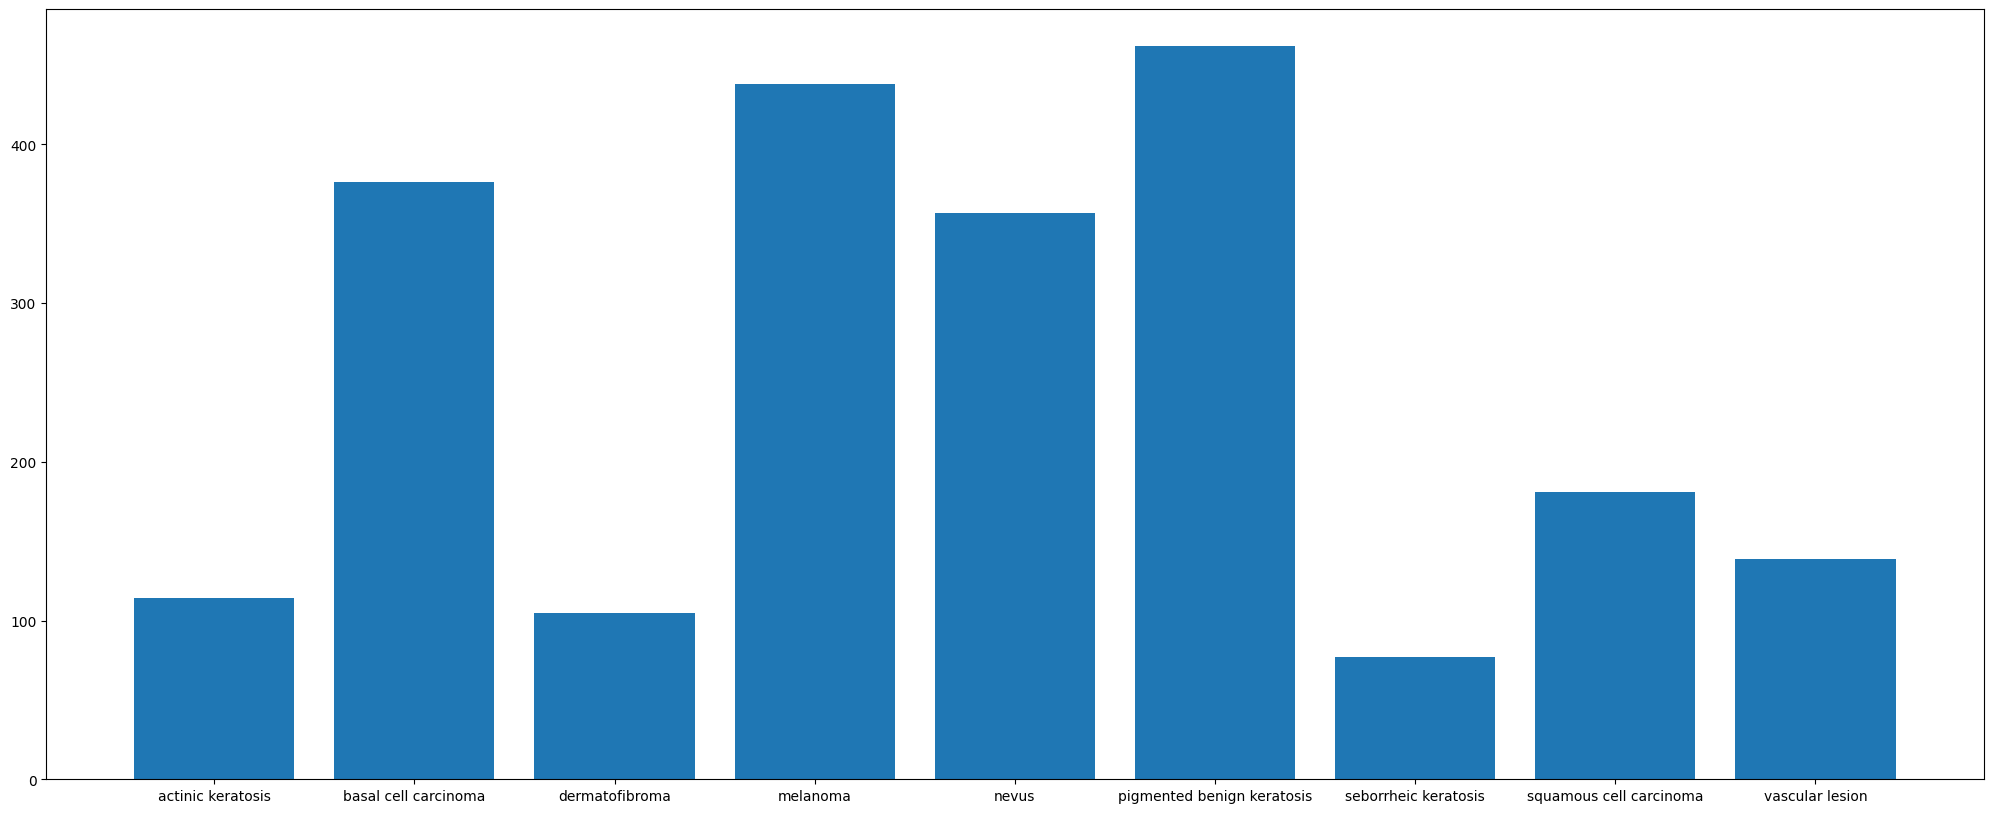

In [39]:
## Your code goes here.
path_list=[]
lesion_list=[]
for i in class_names:

    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])

count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
Ans: Seborrheic Keratosis

#### - Which classes dominate the data in terms proportionate number of samples?
Ans: Pigmented benign keratosis

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [40]:
!pip install Augmentor

  Using cached Augmentor-0.2.12-py2.py3-none-any.whl (38 kB)


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [41]:
#path_to_training_dataset=/content/gdrive/MyDrive/CNN_assignment/SCISIC_Data/Train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("/content/gdrive/MyDrive/CNN_assignment/SCISIC_Data/Train", save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2249 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/SCISIC_Data/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78DB299C57B0>: 100%|██████████| 500/500 [01:05<00:00,  7.60 Samples/s]


Initialised with 2249 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/SCISIC_Data/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78DB22FD8820>: 100%|██████████| 500/500 [00:45<00:00, 10.88 Samples/s]


Initialised with 2249 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/SCISIC_Data/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78DB22D8C040>: 100%|██████████| 500/500 [00:50<00:00,  9.81 Samples/s]


Initialised with 2249 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/SCISIC_Data/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x78DB22FA6B60>: 100%|██████████| 500/500 [00:39<00:00, 12.69 Samples/s]


Initialised with 2249 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/SCISIC_Data/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78DB22E07190>: 100%|██████████| 500/500 [00:56<00:00,  8.93 Samples/s]


Initialised with 2249 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/SCISIC_Data/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78DB22FD9630>: 100%|██████████| 500/500 [00:46<00:00, 10.77 Samples/s]


Initialised with 2249 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/SCISIC_Data/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78DB44D47460>: 100%|██████████| 500/500 [00:42<00:00, 11.67 Samples/s]


Initialised with 2249 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/SCISIC_Data/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x78DB22FA56F0>: 100%|██████████| 500/500 [00:45<00:00, 10.97 Samples/s]


Initialised with 2249 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/SCISIC_Data/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78DB44DEDC60>: 100%|██████████| 500/500 [00:41<00:00, 12.00 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [47]:
data_dir_train=pathlib.Path("/content/gdrive/MyDrive/CNN_assignment/SCISIC_Data/Train/output")
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [49]:
for i in class_names:

    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/gdrive/MyDrive/CNN_assignment/SCISIC_...,actinic keratosis
1,/content/gdrive/MyDrive/CNN_assignment/SCISIC_...,actinic keratosis
2,/content/gdrive/MyDrive/CNN_assignment/SCISIC_...,actinic keratosis
3,/content/gdrive/MyDrive/CNN_assignment/SCISIC_...,actinic keratosis
4,/content/gdrive/MyDrive/CNN_assignment/SCISIC_...,actinic keratosis
...,...,...
6744,/content/gdrive/MyDrive/CNN_assignment/SCISIC_...,vascular lesion
6745,/content/gdrive/MyDrive/CNN_assignment/SCISIC_...,vascular lesion
6746,/content/gdrive/MyDrive/CNN_assignment/SCISIC_...,vascular lesion
6747,/content/gdrive/MyDrive/CNN_assignment/SCISIC_...,vascular lesion


In [50]:
new_df['Label'].value_counts()

pigmented benign keratosis    1368
melanoma                      1322
basal cell carcinoma          1137
nevus                         1065
squamous cell carcinoma        529
vascular lesion                417
actinic keratosis              362
dermatofibroma                 315
seborrheic keratosis           234
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [51]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [53]:
data_dir_train=pathlib.Path("/content/gdrive/MyDrive/CNN_assignment/SCISIC_Data/Train/output")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


#### **Todo:** Create a validation dataset

In [55]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


#### **Todo:** Create your model (make sure to include normalization)

In [59]:
## your code goes here
from keras.layers import BatchNormalization
#Sequential for layer by layer creation of the model
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])

#Convolution Layer 1
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (180, 180, 32)))

#Convolution Layer 2
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Convolution Layer 3
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

#Convolution Layer 4
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Convolution Layer 5
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())


#Convolution Layer 6
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Convolution Layer 7
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Dropout Layer with 50% Fraction
model.add(Dropout(0.5))

#Flatten Layer
model.add(Flatten())

#Dense Layer with Softmax
model.add(Dense(num_classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [60]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [61]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


113/113 [==============================] - 40s 312ms/step - loss: 1.7902 - accuracy: 0.3675 - val_loss: 2.1007 - val_accuracy: 0.2250
Epoch 2/50
113/113 [==============================] - 40s 348ms/step - loss: 1.4984 - accuracy: 0.4678 - val_loss: 1.4748 - val_accuracy: 0.4769
Epoch 3/50
113/113 [==============================] - 42s 369ms/step - loss: 1.4448 - accuracy: 0.4933 - val_loss: 2.0226 - val_accuracy: 0.3731
Epoch 4/50
113/113 [==============================] - 36s 313ms/step - loss: 1.3695 - accuracy: 0.5228 - val_loss: 1.3555 - val_accuracy: 0.5233
Epoch 5/50
113/113 [==============================] - 35s 304ms/step - loss: 1.3008 - accuracy: 0.5322 - val_loss: 1.1769 - val_accuracy: 0.5675
Epoch 6/50
113/113 [==============================] - 35s 299ms/step - loss: 1.2486 - accuracy: 0.5689 - val_loss: 1.7070 - val_accuracy: 0.4828
Epoch 7/50
113/113 [==============================] - 34s 297ms/step - loss: 1.2123 - accuracy: 0.5633 - val_loss: 1.9721 - val_accuracy: 0.3

#### **Todo:**  Visualize the model results

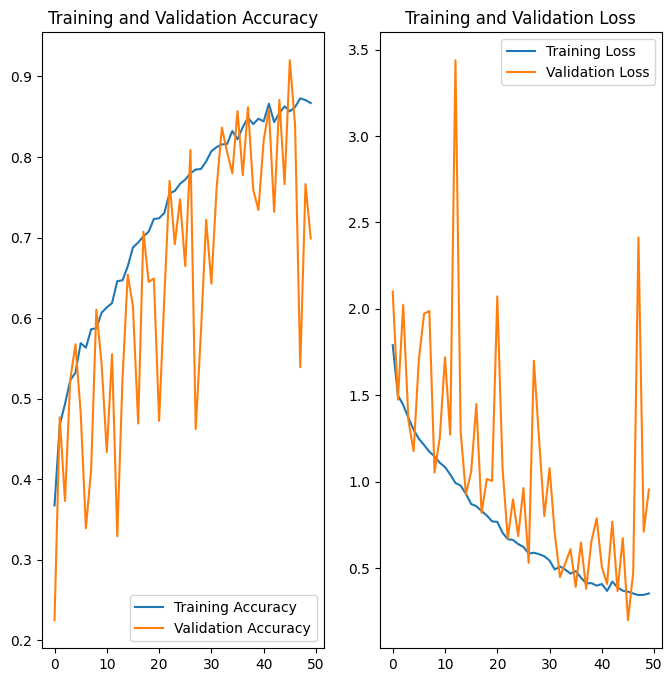

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



1. By using Augmentor library Accuracy on training data has increased

2. Model is still overfitting

3. The Model can be further improved by tuning the hyperparameter tuning
